<a href="https://colab.research.google.com/github/mizzony/ML-class/blob/main/portfolio_3_clustering_world_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World happiness
sutinan thanombun
230147

**Scenario:** MEANING OF TERMS USED IN THE DATASET
GDP per capita:GDP per capita is a measure of a country's economic output that accounts for its number of people.
Social support:Social support means having friends and other people, including family, to turn to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances quality of life and provides a buffer against adverse life events.
Healthy life expectancy:Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health"—in other words, not hampered by disabling illnesses or injuries.
Freedom to make life choices:Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.
Generosity:the quality of being kind and generous.
Perceptions of corruption:The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys..

**Objective 1:** Fresh items are the most sold items in the population. Is there a subset in the population where fresh items are sold less than other items such as grocery or milk? We want to identify such segments and send them offers on "Fresh items."

**Objective 2:** Find the group of customers with high spending on Fresh and low spending on Frozen, and try cross-selling frozen
for that group.

**Objective 3:** Find a customer segment that spends very less on groceries and send those customers promotional offers on
"Grocery."

## Load Dataset

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wholesale customers dataset
wh_2018 = pd.read_csv('https://raw.githubusercontent.com/mizzony/ML-class/refs/heads/main/world-happiness/2018.csv')
wh_2019 = pd.read_csv('https://raw.githubusercontent.com/mizzony/ML-class/refs/heads/main/world-happiness/2019.csv')
wh_2018.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [92]:
wh_2018.tail() #least 5 country (based on the world happiness point)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [93]:
wh_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [94]:
wh_2019.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


Burudi is no longer the world least happiness in 2019 (it is in 2018) and South sudan is fall form number 154 to the least happiness scores country in the world.

In [2]:
# Rows and Columns
print(wh_2018.shape)
print(wh_2018.columns.values)

(156, 9)
['Overall rank' 'Country or region' 'Score' 'GDP per capita'
 'Social support' 'Healthy life expectancy' 'Freedom to make life choices'
 'Generosity' 'Perceptions of corruption']


In [95]:
# Dataset Information
wh_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [96]:
wh_2018.isna().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,1


In [97]:
#clean missing values
wh_2018 = wh_2018.dropna(subset=['Perceptions of corruption'])

In [98]:
wh_2018.isna().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [99]:
# Head
pd.set_option('display.max_columns', None) # This option displays all the columns
wh_2018.sample(n=5, random_state=77)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
104,105,South Africa,4.724,0.940,1.410,0.330,0.516,0.103,0.056
14,15,Germany,6.965,1.340,1.474,0.861,0.586,0.273,0.280
116,117,Iraq,4.456,1.010,0.971,0.536,0.304,0.148,0.095
51,52,Romania,5.945,1.116,1.219,0.726,0.528,0.088,0.001
13,14,Ireland,6.977,1.448,1.583,0.876,0.614,0.307,0.306


## Exploratory Data Analysis

In [100]:
# Summary Statistics with transpose for 2018
round(wh_2018.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Overall rank,155.0,78.88,45.08,1.0,40.50,79.00,117.50,156.00
Score,155.0,5.37,1.12,2.9,4.45,5.36,6.15,7.63
GDP per capita,155.0,0.88,0.38,0.0,0.61,0.94,1.19,1.65
Social support,155.0,1.22,0.30,0.0,1.08,1.26,1.46,1.64
Healthy life expectancy,155.0,0.60,0.25,0.0,0.42,0.64,0.78,1.03
Freedom to make life choices,155.0,0.46,0.16,0.0,0.36,0.49,0.58,0.72
Generosity,155.0,0.18,0.10,0.0,0.11,0.17,0.24,0.60
Perceptions of corruption,155.0,0.11,0.10,0.0,0.05,0.08,0.14,0.46


In [101]:
# Summary Statistics with transpose for 2018
round(wh_2019.describe().T, 2) #there are one more country in 2019

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.50,45.18,1.00,39.75,78.50,117.25,156.00
Score,156.0,5.41,1.11,2.85,4.54,5.38,6.18,7.77
GDP per capita,156.0,0.91,0.40,0.00,0.60,0.96,1.23,1.68
Social support,156.0,1.21,0.30,0.00,1.06,1.27,1.45,1.62
Healthy life expectancy,156.0,0.73,0.24,0.00,0.55,0.79,0.88,1.14
Freedom to make life choices,156.0,0.39,0.14,0.00,0.31,0.42,0.51,0.63
Generosity,156.0,0.18,0.10,0.00,0.11,0.18,0.25,0.57
Perceptions of corruption,156.0,0.11,0.09,0.00,0.05,0.09,0.14,0.45


In [43]:
# Function to highlight both maximum and minimum values
def highlight_max_min(s):
    max_val = s.max()
    min_val = s.min()
    return ['background-color: limegreen' if v == max_val else
            'background-color: lightcoral' if v == min_val else '' for v in s]

# Apply to specific columns
wh_2018.style.apply(
    highlight_max_min,
    subset=['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster_id
0,1,Finland,7.632000,1.305000,1.592000,0.874000,0.681000,0.202000,0.393000,1
1,2,Norway,7.594000,1.456000,1.582000,0.861000,0.686000,0.286000,0.340000,1
2,3,Denmark,7.555000,1.351000,1.590000,0.868000,0.683000,0.284000,0.408000,1
3,4,Iceland,7.495000,1.343000,1.644000,0.914000,0.677000,0.353000,0.138000,1
4,5,Switzerland,7.487000,1.420000,1.549000,0.927000,0.660000,0.256000,0.357000,1
5,6,Netherlands,7.441000,1.361000,1.488000,0.878000,0.638000,0.333000,0.295000,1
6,7,Canada,7.328000,1.330000,1.532000,0.896000,0.653000,0.321000,0.291000,1
7,8,New Zealand,7.324000,1.268000,1.601000,0.876000,0.669000,0.365000,0.389000,1
8,9,Sweden,7.314000,1.355000,1.501000,0.913000,0.659000,0.285000,0.383000,1
9,10,Australia,7.272000,1.340000,1.573000,0.910000,0.647000,0.361000,0.302000,1


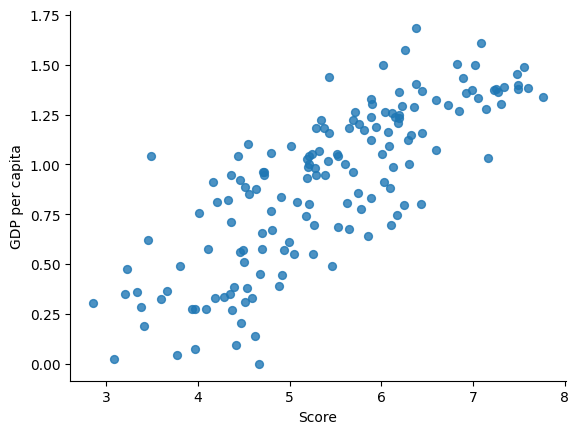

In [6]:
# @title Score vs GDP per capita

from matplotlib import pyplot as plt
wh_2019.plot(kind='scatter', x='Score', y='GDP per capita', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

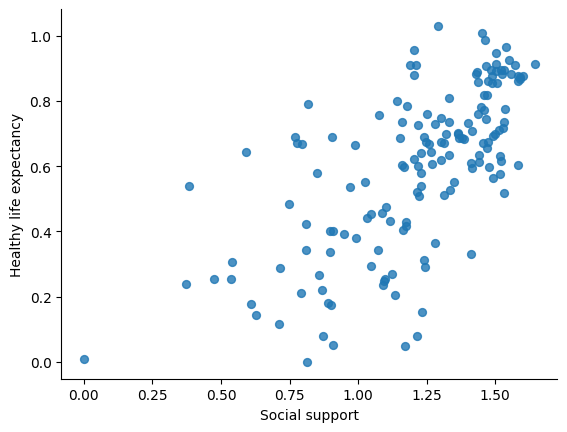

In [7]:
# @title Social support vs Healthy life expectancy

from matplotlib import pyplot as plt
wh_2018.plot(kind='scatter', x='Social support', y='Healthy life expectancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

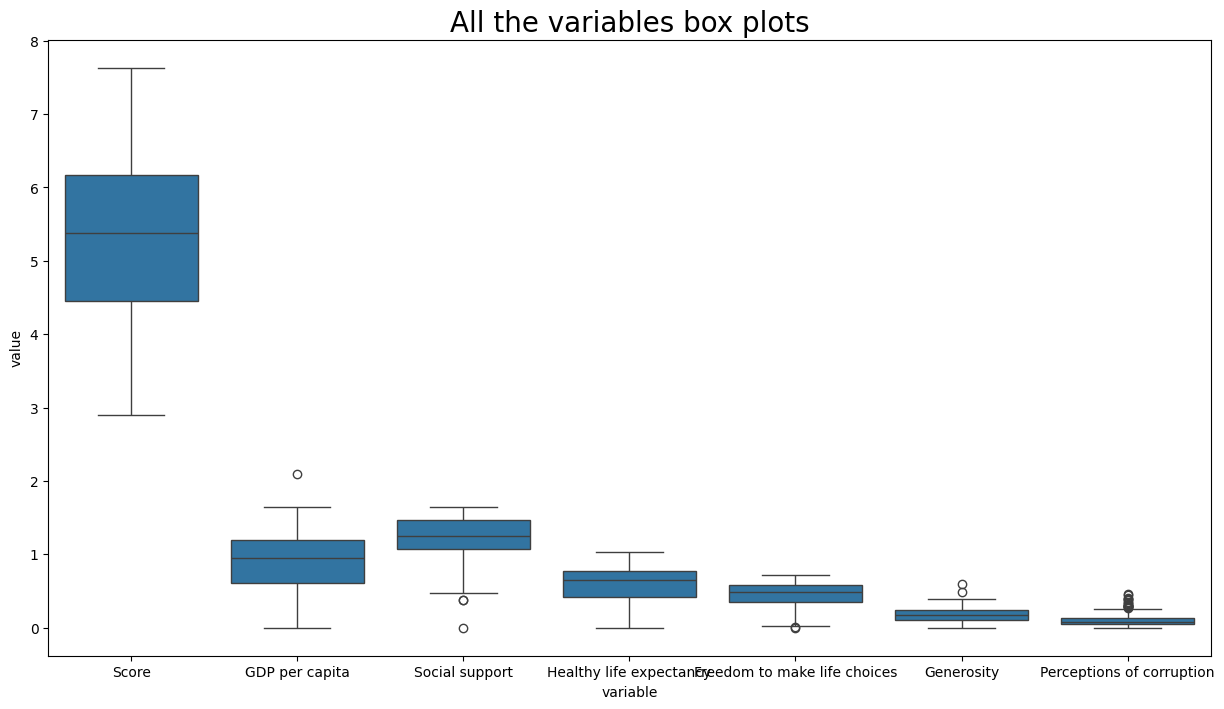

In [19]:
# Box Plots to show distributions of numeric data values,
# especially when you want to compare them between multiple groups.
plt.figure(figsize=(15, 8))
plt.title("All the variables box plots", size=20)
# Corrected column names and removed 'Frozen' if it doesn't exist
sns.boxplot(x="variable", y="value",
            data=pd.melt(wh_2018[['Score',
            'GDP per capita', 'Social support',
                                  'Healthy life expectancy', 'Freedom to make life choices', 'Generosity','Perceptions of corruption']])) # Removed 'Frozen', corrected typos in column names
plt.show()

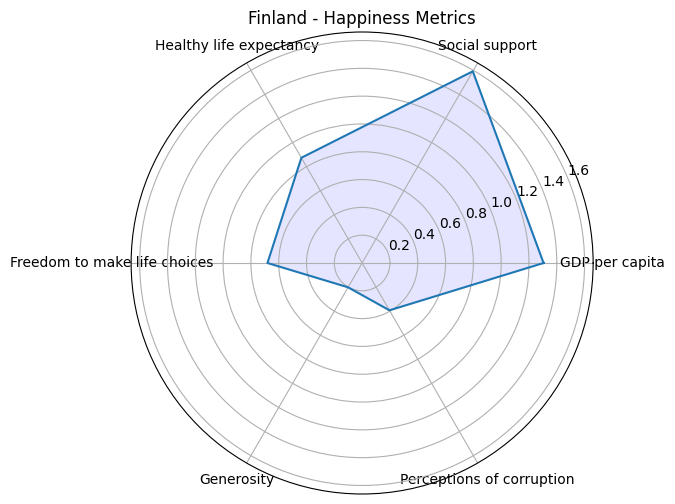

In [18]:
#showing dimention using radar chart for Finland who always be the most world happiness country for 2 years 2018-2019
from math import pi
import pandas as pd
import matplotlib.pyplot as plt

# Example for a single country
country_data = wh_2018[wh_2018['Country or region'] == 'Finland'][[ 'GDP per capita',
                                                          'Social support', 'Healthy life expectancy',
                                                          'Freedom to make life choices', 'Generosity',
                                                          'Perceptions of corruption']]
categories = country_data.columns
values = country_data.iloc[0].values.flatten().tolist()

values += values[:1]  # to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories)
ax.plot(angles, values)
ax.fill(angles, values, 'blue', alpha=0.1)
plt.title('Finland - Happiness Metrics 2018')
plt.show()


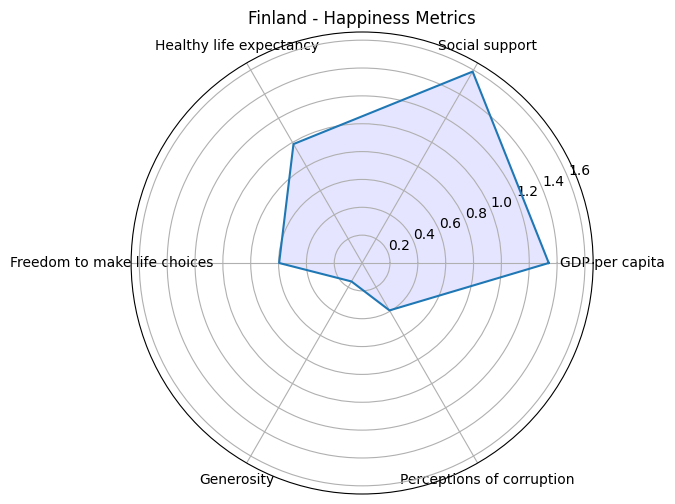

In [23]:
#showing dimention using radar chart for Finland who always be the most world happiness country for 2 years 2018-2019
from math import pi
import pandas as pd
import matplotlib.pyplot as plt

# Example for a single country
country_data = wh_2019[wh_2019['Country or region'] == 'Finland'][[ 'GDP per capita',
                                                          'Social support', 'Healthy life expectancy',
                                                          'Freedom to make life choices', 'Generosity',
                                                          'Perceptions of corruption']]
categories = country_data.columns
values = country_data.iloc[0].values.flatten().tolist()

values += values[:1]  # to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories)
ax.plot(angles, values)
ax.fill(angles, values, 'blue', alpha=0.1)
plt.title('Finland - Happiness Metrics 2019')
plt.show()

the radar chart for Finland in each dimention remain nearly the same. Except the Generosity that 2019 slightly lower than 2018. lets look at other low point of world happiness

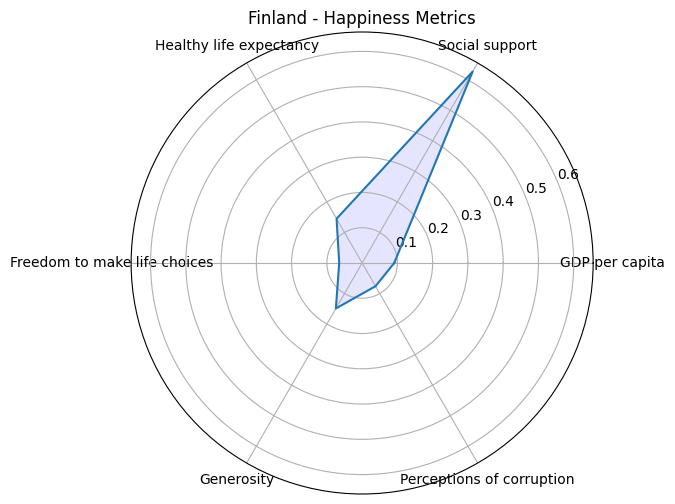

In [27]:
#showing dimention using radar chart Burundi the least happiness country in the world
from math import pi
import pandas as pd
import matplotlib.pyplot as plt

# Example for a single country
country_data = wh_2018[wh_2018['Country or region'] == 'Burundi'][[ 'GDP per capita',
                                                          'Social support', 'Healthy life expectancy',
                                                          'Freedom to make life choices', 'Generosity',
                                                          'Perceptions of corruption']]
categories = country_data.columns
values = country_data.iloc[0].values.flatten().tolist()

values += values[:1]  # to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories)
ax.plot(angles, values)
ax.fill(angles, values, 'blue', alpha=0.1)
plt.title('Finland - Happiness Metrics')
plt.show()

apparently both highest happiness country and lowest point of happiness share the very high score of social support. but interestingly Burundi have higher point of  generosity than Finland.

## Distance Measure between Customers

In [29]:
# Sample data for distance calculation
data_sample = wh_2018.sample(n=10, random_state=77)
data_sample[['Country or region', 'Generosity','Social support']] #observe with one group first

,Country or region,Generosity,Social support
103,Palestinian Territories,0.086,1.217
14,Germany,0.273,1.474
115,Sri Lanka,0.307,1.314
50,Slovenia,0.160,1.506
13,Ireland,0.307,1.583
5,Netherlands,0.333,1.488
67,Turkmenistan,0.199,1.533
154,Central African Republic,0.218,0.000
69,Libya,0.116,1.350
136,Sudan,0.134,1.240


## Distance Matrix Calculation

there are Euclidean Euclidean distance is a method for calculating the distance between two points by squaring the differences in each dimension, adding them together, and then taking the square root of the result. The formula for Euclidean distance depends on the number of dimensions being considered

 and manhatton method to find distance.


In [31]:
#manhattan method

def distance_cal_manhattan(data_frame):
    # Initialize a zero matrix with dimensions equal to (n x n)
    distance_matrix = np.zeros((data_frame.shape[0], data_frame.shape[0]))

    # Loop through every pair of rows (i, j)
    for i in range(0, data_frame.shape[0]):
        for j in range(0, data_frame.shape[0]):
            # Calculate Manhattan distance between row i and row j
            distance_matrix[i, j] = round(
                sum(abs(data_frame.iloc[i] - data_frame.iloc[j]))
            )

    # Return the distance matrix
    return distance_matrix

# Usage example
distance_matrix = distance_cal_manhattan(wh_2018[['Generosity', 'Social support']])
print(distance_matrix)
print(distance_matrix[0, 0])
print(distance_matrix[1, 0])
print(distance_matrix[2, 1])

[[0. 0. 0. ... 1. 2. 1.]
 [0. 0. 0. ... 1. 2. 1.]
 [0. 0. 0. ... 1. 2. 1.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [2. 2. 2. ... 1. 0. 1.]
 [1. 1. 1. ... 0. 1. 0.]]
0.0
0.0
0.0


## K-Means Clustering

In [65]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Building K-Means model with 5 clusters
kmeans = KMeans(n_clusters=6, random_state=333) # Mention the Number of clusters
X = wh_2018.drop(['Overall rank',	'Country or region','Score'], axis=1) # Custid is not needed

kmeans = kmeans.fit(X) # Model building

# Getting the cluster labels and attaching them to the original data
wh_clusters = wh_2018
#define new column to predict cluster
wh_clusters['Cluster_id'] = kmeans.predict(X)
wh_clusters.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster_id
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,3
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,3
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,3
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,3
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295,3
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291,3
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389,3
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383,3
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302,3


In [68]:
wh_clusters.tail(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster_id
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,5
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,5
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076,5


apparently all top high happiness scores country fall into cluster 3 and least happiness fall into cluster 5 as shown above

In [88]:
#see the changes of the happiness country in this 2 years
import pandas as pd

# Rename columns for clarity after merging
wh_2018 = wh_2018.rename(columns={"Score": "Score_2018"})
wh_2019 = wh_2019.rename(columns={"Score": "Score_2019"})

# Merge the datasets on 'Country or region'
# Changed 'Score' to 'Score_2018' to match the renamed column
happiness_comparison = pd.merge(wh_2018[['Country or region', 'Score_2018']],
                                wh_2019[['Country or region', 'Score_2019']],
                                on='Country or region', how='inner') # Changed 'Country' to 'Country or region'

# Calculate the score difference
happiness_comparison['Score_Change'] = happiness_comparison['Score_2019'] - happiness_comparison['Score_2018']

# Filter countries with a change in happiness score
happiness_changed = happiness_comparison[happiness_comparison['Score_Change'] != 0]

# Display results
print(happiness_changed[['Country or region', 'Score_2018', 'Score_2019', 'Score_Change']]) # Changed 'Country' to 'Country or region'

    Country or region  Score_2018  Score_2019  Score_Change
0             Finland       7.632       7.769         0.137
1              Norway       7.594       7.554        -0.040
2             Denmark       7.555       7.600         0.045
3             Iceland       7.495       7.494        -0.001
4         Switzerland       7.487       7.480        -0.007
..                ...         ...         ...           ...
145            Rwanda       3.408       3.334        -0.074
146             Yemen       3.355       3.380         0.025
147          Tanzania       3.303       3.231        -0.072
148       South Sudan       3.254       2.853        -0.401
150           Burundi       2.905       3.775         0.870

[144 rows x 4 columns]


In [89]:
# Top and Bottom Happiness Countries with Cluster Color Coding
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top and bottom 10 countries by happiness score
top_10 = wh_2018.nlargest(10, 'Score_2018')
bottom_10 = wh_2018.nsmallest(10, 'Score')
combined = pd.concat([top_10, bottom_10])

# Plot with cluster color coding
plt.figure(figsize=(12, 8))
# Changed 'cluster_id' to 'Cluster_id' for the hue parameter
sns.barplot(data=combined, x='Score', y='Country or region', hue='Cluster_id', dodge=False, palette='Set2')
plt.title("Top and Bottom 10 Countries by Happiness Score, Colored by Cluster")
plt.legend(title="Cluster ID")
plt.show()

KeyError: 'Score'

In [84]:
#2018 show a map of happiness country versus other so we can see insights
import plotly.express as px

fig = px.choropleth(wh_2018, locations="Country or region", locationmode="country names",
                    color="Score", hover_name="Country or region", # Changed hover_name to 'Country or region'
                    color_continuous_scale="Viridis",
                    title="World Happiness Scores by Country and Cluster 2018",
                    labels={'Cluster_id': 'Cluster'}) # Changed 'cluster_id' to 'Cluster_id'
fig.show()


In [85]:
#2019 show a map of happiness country versus other so we can see insights
import plotly.express as px

fig = px.choropleth(wh_2019, locations="Country or region", locationmode="country names",
                    color="Score", hover_name="Country or region", # Changed hover_name to 'Country or region'
                    color_continuous_scale="Viridis",
                    title="World Happiness Scores by Country and Cluster 2019",
                    labels={'Cluster_id': 'Cluster'}) # Changed 'cluster_id' to 'Cluster_id'
fig.show()

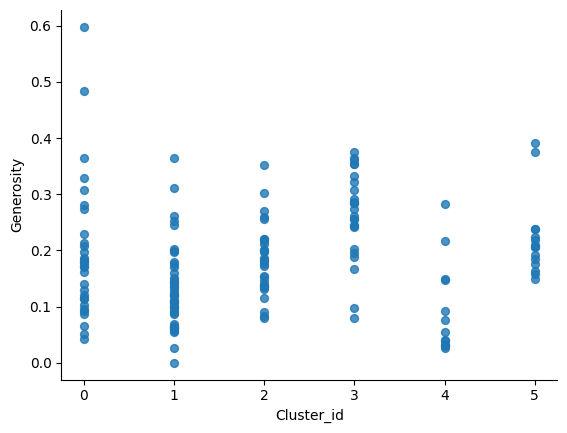

In [72]:
#plot some genrosity abd Cluster ID
from matplotlib import pyplot as plt
wh_2018.plot(kind='scatter', x='Cluster_id', y='Generosity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [73]:
# Final Results
cluster_counts = wh_2018['Cluster_id'].value_counts(sort=False).sort_index()

# Select only numeric columns for calculating the mean
numeric_cols = wh_2018.select_dtypes(include=['number']).columns
cluster_means = wh_2018.groupby(['Cluster_id'])[numeric_cols].mean()

print(cluster_counts)
print(round(cluster_means, 1))

Cluster_id
0    30
1    43
2    29
3    25
4    13
5    15
Name: count, dtype: int64
            Overall rank  Score  GDP per capita  Social support  \
Cluster_id                                                        
0                   81.7    5.3             0.8             1.3   
1                   52.7    5.9             1.1             1.4   
2                  122.8    4.3             0.5             1.0   
3                   19.8    6.9             1.4             1.5   
4                  104.8    4.8             0.9             1.0   
5                  139.1    3.8             0.2             0.6   

            Healthy life expectancy  Freedom to make life choices  Generosity  \
Cluster_id                                                                      
0                               0.6                           0.5         0.2   
1                               0.7                           0.4         0.1   
2                               0.3                   

## Cluster-wise Visualization

Text(0.5, 1.0, 'Cluster id vs Spendings')

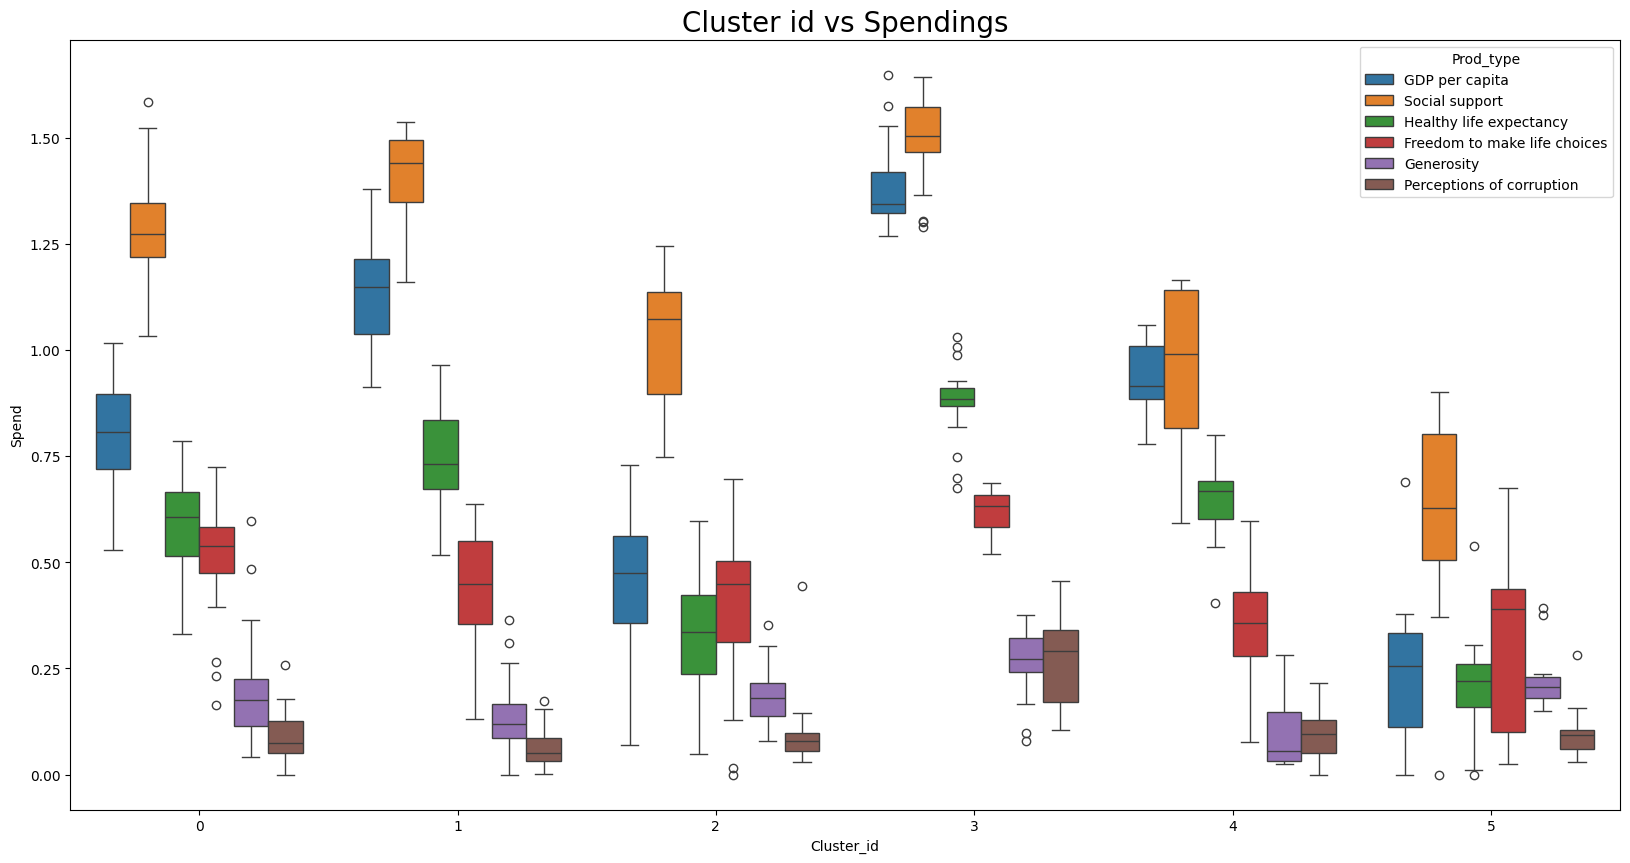

In [71]:
# Cluster-wise Spendings box plot
df_melt = pd.melt(wh_2018.drop(['Country or region', 'Overall rank','Score'], axis=1), 'Cluster_id', var_name='Prod_type', value_name='Spend')

plt.figure(figsize=(20, 10))
# changed  y='Score' to y='Spend' since 'Score' is not in df_melt
sns.boxplot(x='Cluster_id', hue='Prod_type', y='Spend', data=df_melt)
plt.title("Cluster id vs Spendings", size=20)

## Objectives Analysis

['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia', 'Austria', 'Ireland', 'Germany', 'Belgium', 'Luxembourg', 'United States', 'Israel', 'Malta', 'France', 'Qatar', 'Singapore', 'Bahrain', 'Kuwait', 'Japan', 'Hong Kong', 'Somalia', 'Sierra Leone', 'Mozambique', 'Niger', 'Benin', 'Togo', 'Guinea', 'Afghanistan', 'Malawi', 'Haiti', 'Liberia', 'Syria', 'South Sudan', 'Central African Republic', 'Burundi']


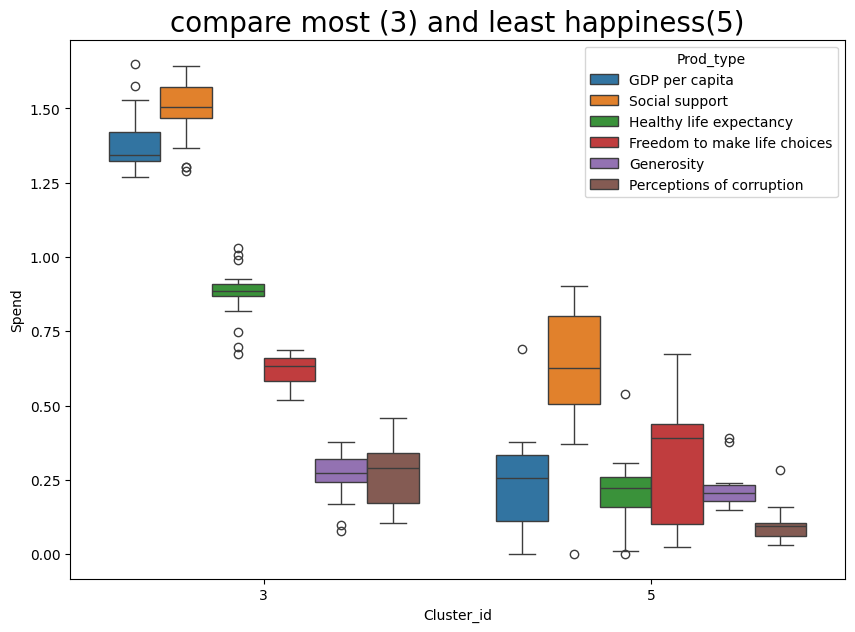

In [78]:
# Objective 1: compare people in Cluster 3(most happiness) and 5 (least happiness)
Cluster_2and3 = df_melt[(df_melt['Cluster_id'] == 3) | (df_melt['Cluster_id'] ==5)]
plt.figure(figsize=(10, 7))
sns.boxplot(x='Cluster_id', hue='Prod_type', y='Spend', data=Cluster_2and3)
plt.title("compare most (3) and least happiness(5)", size=20)

obj1_data = wh_2018[(wh_2018['Cluster_id'] == 3) | (wh_2018['Cluster_id'] == 5)]
print(list(obj1_data['Country or region']))

## Model Inertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K )

In [60]:
# Model inertia
print(kmeans.inertia_)

13.417845719860996


## Elbow Method

In [61]:
# Elbow method for determining optimal K
elbow_data = pd.DataFrame()
for i in range(1, 16):
    kmeans_m2 = KMeans(n_clusters=i, random_state=333)
    X = wh_2018.drop(['Country or region', 'Overall rank','Score'], axis=1)
    model = kmeans_m2.fit(X)
    elbow_data.at[i, 'K'] = i
    elbow_data.at[i, 'Inertia'] = round(model.inertia_) / 10000000
print(elbow_data)

       K       Inertia
1    1.0  4.080000e-05
2    2.0  1.040000e-05
3    3.0  6.800000e-06
4    4.0  4.400000e-06
5    5.0  4.200000e-06
6    6.0  1.200000e-06
7    7.0  1.100000e-06
8    8.0  1.100000e-06
9    9.0  1.000000e-06
10  10.0  9.000000e-07
11  11.0  9.000000e-07
12  12.0  9.000000e-07
13  13.0  8.000000e-07
14  14.0  8.000000e-07
15  15.0  8.000000e-07


The elbow method would likely suggest an optimal
𝐾
K around 6 or 7 clusters, where inertia plateaus, and the reduction in inertia is minimal with additional clusters.

Text(0, 0.5, 'Inertia')

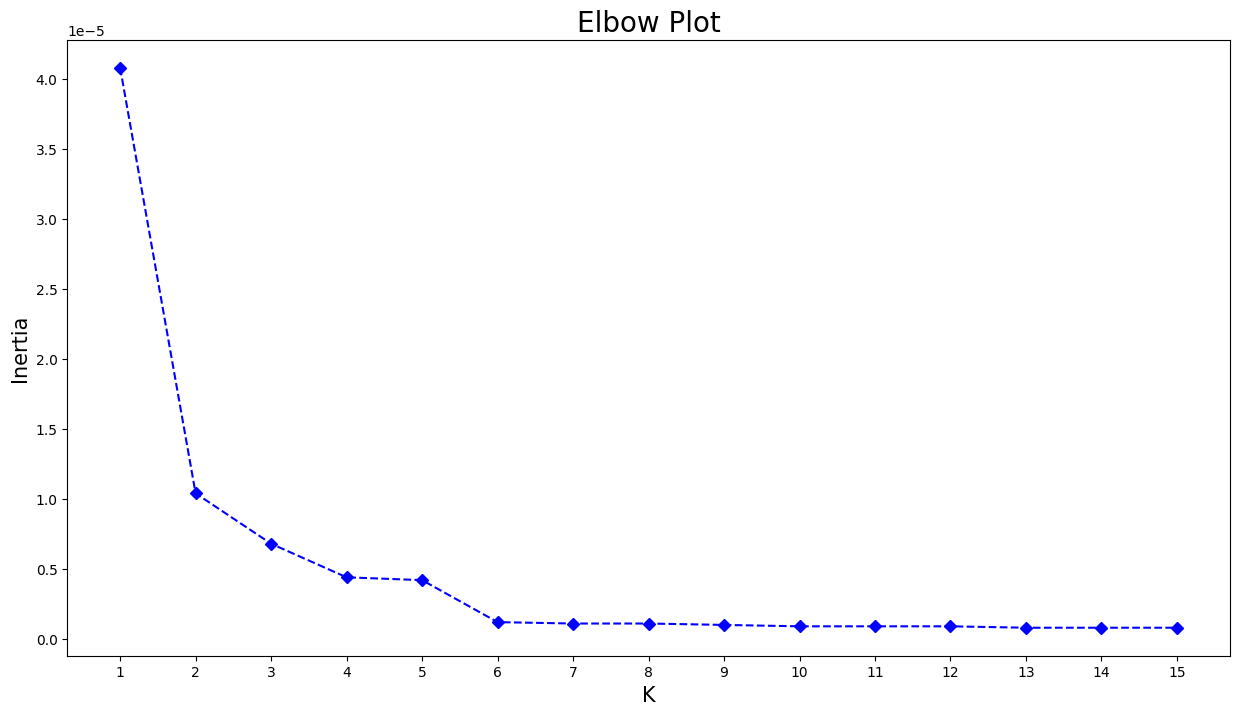

In [62]:
# Elbow Plot
plt.figure(figsize=(15, 8))
plt.title("Elbow Plot", size=20)
plt.plot(elbow_data['K'], elbow_data['Inertia'], '--bD')
plt.xticks(elbow_data['K'])
plt.xlabel("K", size=15)
plt.ylabel("Inertia", size=15)

For n_clusters = 2, the average silhouette score is: 0.6186411010207052
For n_clusters = 3, the average silhouette score is: 0.576748704695737
For n_clusters = 4, the average silhouette score is: 0.5528719466803758
For n_clusters = 5, the average silhouette score is: 0.5352518412909358
For n_clusters = 6, the average silhouette score is: 0.5234590033577569
For n_clusters = 7, the average silhouette score is: 0.5177692055237162
For n_clusters = 8, the average silhouette score is: 0.5101712434353628
For n_clusters = 9, the average silhouette score is: 0.49634989819270237
For n_clusters = 10, the average silhouette score is: 0.48140882417262987
For n_clusters = 11, the average silhouette score is: 0.47318352308217815
For n_clusters = 12, the average silhouette score is: 0.4618424101985432
For n_clusters = 13, the average silhouette score is: 0.4547215093887057
For n_clusters = 14, the average silhouette score is: 0.45429584250791905
For n_clusters = 15, the average silhouette score is: 0.

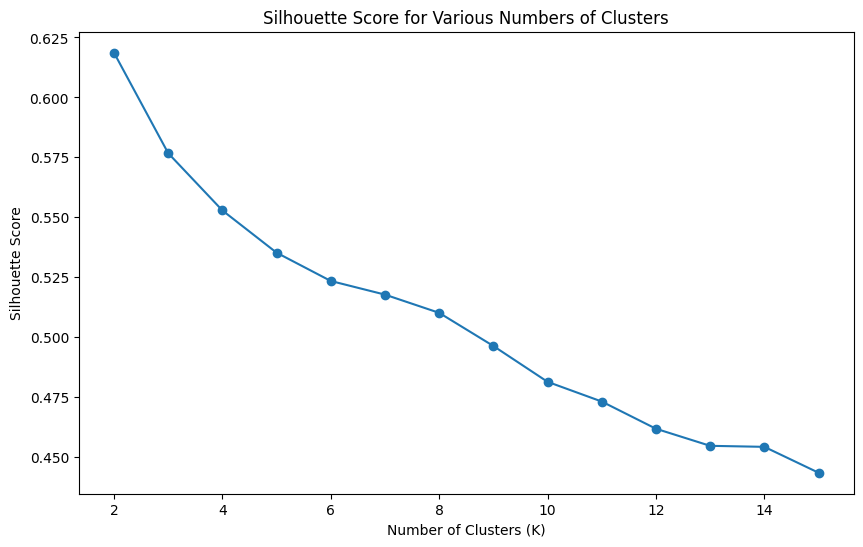

In [66]:
# Silhouette Score (optional)The silhouette score measures how similar each data
# point is to its own cluster compared to other clusters.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame manipulation

# Define the range for number of clusters
range_n_clusters = range(2, 16)  # typically, you start from 2 clusters

# Empty lists to hold results
silhouette_avg_scores = []

# Loop over the range of cluster values
for n_clusters in range_n_clusters:
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)

    # Select only numerical features for clustering
    # Drop non-numeric columns before fitting
    X = wh_2018.select_dtypes(include=['number'])

    cluster_labels = kmeans.fit_predict(X)

    # Calculate the silhouette score using the numerical features
    silhouette_avg = silhouette_score(X, cluster_labels)

    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores for different values of K
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title("Silhouette Score for Various Numbers of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [102]:
#see the changes of the happiness country in this 2 years
import pandas as pd

# Rename columns for clarity after merging
wh_2018 = wh_2018.rename(columns={"Score": "Score_2018"})
wh_2019 = wh_2019.rename(columns={"Score": "Score_2019"})

# Merge the datasets on 'Country or region'
# Changed 'Score' to 'Score_2018' to match the renamed column
happiness_comparison = pd.merge(wh_2018[['Country or region', 'Score_2018']],
                                wh_2019[['Country or region', 'Score_2019']],
                                on='Country or region', how='inner') # Changed 'Country' to 'Country or region'

# Calculate the score difference
happiness_comparison['Score_Change'] = happiness_comparison['Score_2019'] - happiness_comparison['Score_2018']

# Filter countries with a change in happiness score
happiness_changed = happiness_comparison[happiness_comparison['Score_Change'] != 0]

# Display results
print(happiness_changed[['Country or region', 'Score_2018', 'Score_2019', 'Score_Change']]) # Changed 'Country' to 'Country or region'

    Country or region  Score_2018  Score_2019  Score_Change
0             Finland       7.632       7.769         0.137
1              Norway       7.594       7.554        -0.040
2             Denmark       7.555       7.600         0.045
3             Iceland       7.495       7.494        -0.001
4         Switzerland       7.487       7.480        -0.007
..                ...         ...         ...           ...
145            Rwanda       3.408       3.334        -0.074
146             Yemen       3.355       3.380         0.025
147          Tanzania       3.303       3.231        -0.072
148       South Sudan       3.254       2.853        -0.401
150           Burundi       2.905       3.775         0.870

[144 rows x 4 columns]


<ipython-input-106-f9f31dfe10f6>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




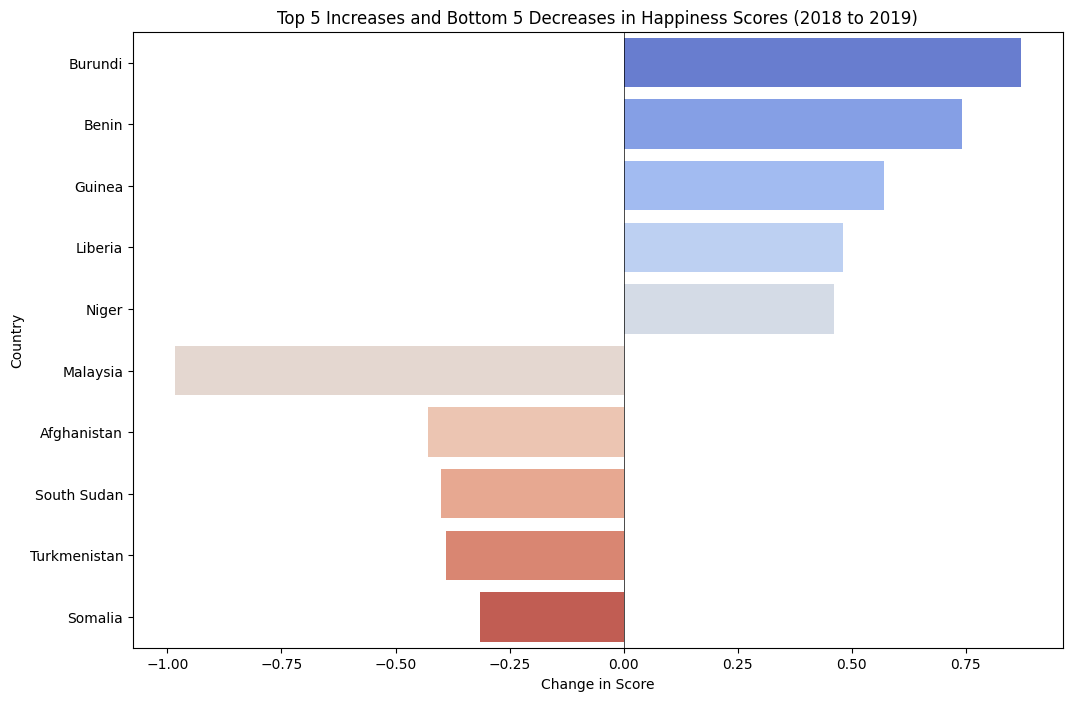

In [106]:
# top 5 increases and bottom 5 decreases in happiness scores
top_5_increase = happiness_changed.nlargest(5, 'Score_Change')
bottom_5_decrease = happiness_changed.nsmallest(5, 'Score_Change')
top_bottom_10 = pd.concat([top_5_increase, bottom_5_decrease])

# Plot the filtered data
plt.figure(figsize=(12, 8))
# Changed 'Country or Region' to 'Country or region' to match the column name
sns.barplot(x='Score_Change', y='Country or region', data=top_bottom_10,
            palette='coolwarm', orient='h')
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at 0 for reference
plt.title("Top 5 Increases and Bottom 5 Decreases in Happiness Scores (2018 to 2019)")
plt.xlabel("Change in Score")
plt.ylabel("Country")
plt.show()



Burundi make some biggest change and no longer be the world least happiness country after 2018.